In [10]:
# How many Google reviews does Jinya Ramen have if it has 799 Yelp reviews?
# The study I plan to conduct is an observational retrospective study, because I will not be intervening with the data and I'm examining data that already exists and has been created. I will examine a population and census data set of all Ramen restaurants in Denver and compare their Google and Yelp reviews to that of Jinya Ramen.
# The dataset I plan to use was hand-collected from Google and Yelp by looking at ramen places in Denver, without the use of AI for assistance. Some biases that could've been produced is that since it was hand collected, it could be very likely that we are missing information or that some information from the dataset may be incorrect.

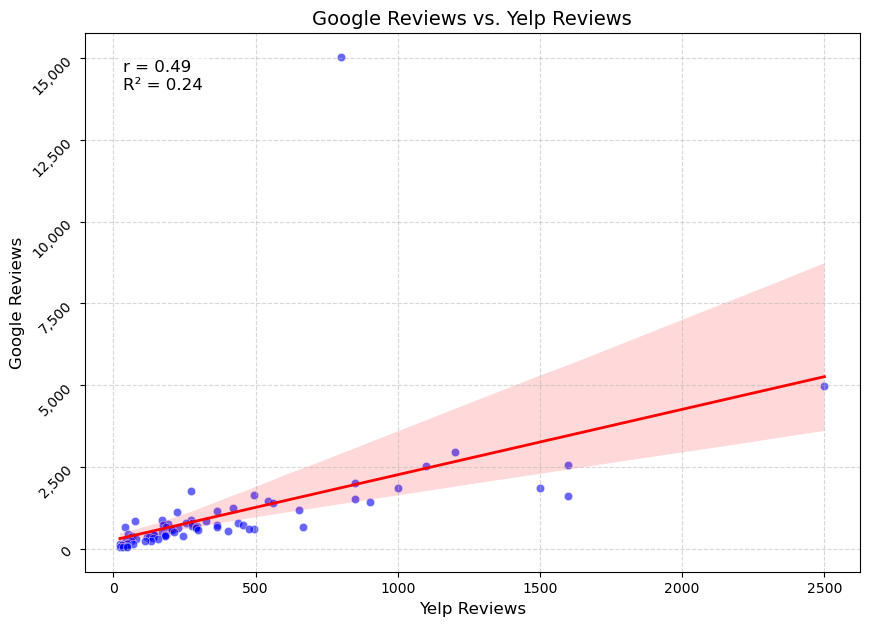

Analysis: Jinya Ramen has 15,024 Google reviews when it has 799 Yelp reviews. This fits with the other data, where the correlation between Yelp and Google reviews is moderate, as shown in the r value being 0.49. While there is some positive relationship between both of the types of reviews, Jinya stands out as having far more Google reviews compared to its Yelp reviews.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import pearsonr

# Load data
df = pd.read_csv("Denver Ramen Restaurants - Sheet1.csv")

# Convert review columns to numeric values
df["Yelp Reviews"] = pd.to_numeric(df["Yelp Reviews"], errors='coerce')
df["Google Reviews"] = pd.to_numeric(df["Google Reviews"], errors='coerce')

# Drop NaN values
df_clean = df.dropna(subset=["Yelp Reviews", "Google Reviews"])

plt.figure(figsize=(10,7))

# Scatter plot
sns.scatterplot(data=df_clean, x="Yelp Reviews", y="Google Reviews", color="blue", alpha=0.6)

# Add line of best fit
sns.regplot(
    data=df_clean, 
    x="Yelp Reviews", 
    y="Google Reviews", 
    scatter=False,
    color="red", 
    line_kws={"linewidth":2}
)

# Calculate Pearson correlation
r, _ = pearsonr(df_clean["Yelp Reviews"], df_clean["Google Reviews"])
r2 = r**2

# Display correlation and R² on plot
plt.text(
    0.05, 0.95, 
    f"r = {r:.2f}\nR² = {r2:.2f}", 
    transform=plt.gca().transAxes,  # relative to axes
    fontsize=12, 
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
)

plt.title("Google Reviews vs. Yelp Reviews", fontsize=14)
plt.xlabel("Yelp Reviews", fontsize=12)
plt.ylabel("Google Reviews", fontsize=12)

# Adjust y-axis ticks
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=8))  
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))  

plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Analysis
print("Analysis: Jinya Ramen has 15,024 Google reviews when it has 799 Yelp reviews. This fits with the other data, where the correlation between Yelp and Google reviews is moderate, as shown in the r value being 0.49. While there is some positive relationship between both of the types of reviews, Jinya stands out as having far more Google reviews compared to its Yelp reviews.")

In [12]:
# Outlier - I plan to remove the singular outlier from my analysis because it doesn't correlate with the rest of my graph, and the google reviews could've been inaccurate or tampered with.